In [1]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Building CNN Model:

In [4]:
tensorflow.test.is_gpu_available()

True

In [5]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
labels = os.listdir("../input/drowsiness-dataset/train")

In [7]:
labels

['Closed', 'Open', 'yawn', 'no_yawn']

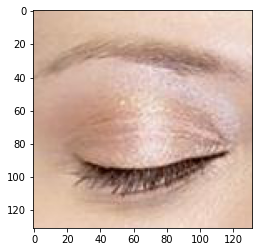

In [8]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/Closed/_2.jpg"))

In [9]:
a = plt.imread("../input/drowsiness-dataset/train/yawn/10.jpg")

In [10]:
a

array([[[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [157, 165, 178],
        [156, 164, 177],
        [156, 164, 177]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [155, 163, 176],
        [155, 163, 176],
        [155, 163, 176]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [154, 162, 175],
        [154, 162, 175],
        [155, 163, 176]]

In [11]:
a.shape

(480, 640, 3)

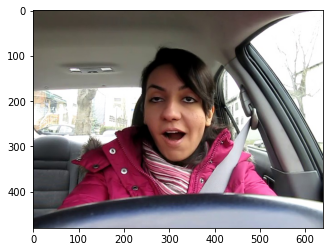

In [12]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/yawn/5.jpg"))

In [13]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [14]:
train_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2321 images belonging to 4 classes.


In [15]:
validation_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 579 images belonging to 4 classes.


In [16]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [17]:
test_data = test_data_gen.flow_from_directory("../input/drowsiness-dataset/train",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [18]:
train_data

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [20]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [21]:
model.build(input_shape=(80, 80, 3))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          1

In [23]:
validation_steps = len(test_data)
validation_steps

363

In [ ]:
hist = model.fit(train_data, epochs=55, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/55
291/291 [==============================] - 44s 126ms/step - loss: 0.7951 - accuracy: 0.5972 - val_loss: 0.4696 - val_accuracy: 0.7586
Epoch 2/55
291/291 [==============================] - 25s 86ms/step - loss: 0.4515 - accuracy: 0.8005 - val_loss: 0.3632 - val_accuracy: 0.8241
Epoch 3/55
291/291 [==============================] - 25s 86ms/step - loss: 0.3635 - accuracy: 0.8324 - val_loss: 0.4776 - val_accuracy: 0.7828
Epoch 4/55
291/291 [==============================] - 24s 83ms/step - loss: 0.3178 - accuracy: 0.8492 - val_loss: 0.3303 - val_accuracy: 0.8424
Epoch 5/55
291/291 [==============================] - 25s 84ms/step - loss: 0.2873 - accuracy: 0.8707 - val_loss: 0.2679 - val_accuracy: 0.8879
Epoch 6/55
291/291 [==============================] - 25s 86ms/step - loss: 0.2445 - accuracy: 0.8996 - val_loss: 0.2446 - val_accuracy: 0.8986
Epoch 7/55
291/291 [==============================] - 25s 85ms/step - loss: 0.1926 - accuracy: 0.9181 - val_loss: 0.2366 - val_accuracy

In [ ]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

In [ ]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
# model.save("drowiness.h5")